<a href="https://colab.research.google.com/github/HanzhouLiu/python_fromzero/blob/main/Graph_Leetcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 130. Surrounded Regions

Given an m x n matrix board containing 'X' and 'O', capture all regions that are 4-directionally surrounded by 'X'.

A region is captured by flipping all 'O's into 'X's in that surrounded region.
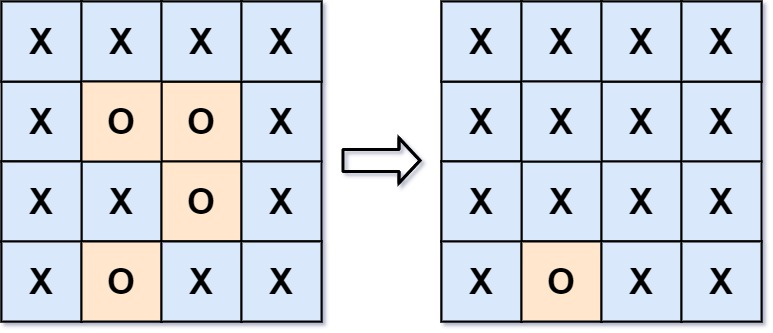
https://assets.leetcode.com/uploads/2021/02/19/xogrid.jpg

Solution: By DFS

In [ ]:
class Solution(object):
    def solve(self, board):
        """
        :type board: List[List[str]]
        :rtype: None Do not return anything, modify board in-place instead.
        """
        rows, cols = len(board), len(board[0])
        def dfs(r, c):
            if (r < 0 or c < 0 or r == rows
               or c == cols or board[r][c] != "O"):
                return
            board[r][c] = "T"
            dfs(r - 1, c)
            dfs(r, c - 1)
            dfs(r + 1, c)
            dfs(r, c + 1)
            
        # (dfs) capture all unsurrounded regions
        for r in range(rows):
            for c in range(cols):
                if board[r][c] == "O" and (r in [0, rows - 1] or c in [0, cols - 1]):
                    dfs(r, c)
        
        # capture all surrounded regions
        for r in range(rows):
            for c in range(cols):
                if board[r][c] == "O":
                    board[r][c] = "X"
        
        # Uncapture all unsurrounded regions
        for r in range(rows):
            for c in range(cols):
                if board[r][c] == "T":
                    board[r][c] = "O"

#   Lintcode 178

Given n nodes labeled from 0 to n - 1 and a list of undirected edges (each edge is a pair of nodes), write a function to check whether these edges make up a valid tree.

In [1]:
def validTree(self, n, edges):
    if not n:
        return True
    adj = {_ : [] for _ in range(n)}
    for n1, n2 in edges:
        adj[n1].append(n2)
        adj[n2].append(n1)
    
    visit = set()
    def dfs(i, prev):
        if i in visit:
            return False
        
        visit.add(i)
        for j in adj[i]:
            if j == prev:
                continue
            if not dfs(j, i):
                return False
        return True
    
    return dfs(0, -1) and n == len(visit)